In [ ]:
!pip install earthpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 54.6 MB/s eta 0:00:00


In [ ]:
# Import packages
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et

In [ ]:
#nation_loc = gpd.read_file('/content/drive/MyDrive/Thesis/Chapter_2_writings/figures/national_boundaries/cb_2018_us_nation_5m/cb_2018_us_nation_5m.shp')
state_loc = gpd.read_file('/content/cb_2018_us_state_5m.shp')

plot_loc = gpd.read_file('/content/mortality_points.shp')
sage_loc = gpd.read_file('/content/artetrid.shp')
nation_loc = gpd.read_file('/content/PoliticalBoundaries_Shapefiles_NA_PoliticalDivisions_data_bound_l_boundary_l_v2.shp')

In [ ]:
#plot_loc = plot_loc[plot_loc['Rname']!='UT02']

In [ ]:
options = ['USA','CAN','MEX']
nation_loc=nation_loc[nation_loc['COUNTRY'].isin(options)]

In [ ]:
state_loc_wgs84  = state_loc.to_crs({'init': 'epsg:4269'})
sage_loc_wgs84 = sage_loc.to_crs({'init':'epsg:4296'})
nation_loc_wgs84 = nation_loc.to_crs({'init':'epsg:4296'})


/usr/local/lib/python3.11/dist-packages/pyproj/crs/crs.py:143: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
minx, miny, maxx, maxy = plot_loc.total_bounds

In [ ]:
plot_loc

,Lat_DD,Long_DD,Rname,Photos,geometry,labels
0,38.12047,-108.7123,CO01,20210712,POINT (-108.7123 38.12047),Colorado 1
1,38.22511,-115.0282,NV01,20220517,POINT (-115.0282 38.22511),Nevada 1
2,38.99797,-112.0208,UT01,20220615,POINT (-112.0208 38.99797),Utah 1
3,41.6434,-113.6674,UT02,20220616_y,POINT (-113.6674 41.6434),Utah 2
4,41.06556,-114.4423,NV02,None,POINT (-114.4423 41.06556),Nevada 2
5,42.071168,-109.964906,WY01,None,POINT (-109.96491 42.07117),Wyoming 1


In [ ]:
plot_loc['labels']= ['Colorado 1','Nevada 1','Utah 1','Utah 2','Nevada 2','Wyoming 1']

In [ ]:
plot_loc.loc[0,'Long_DD']

'-108.7123'

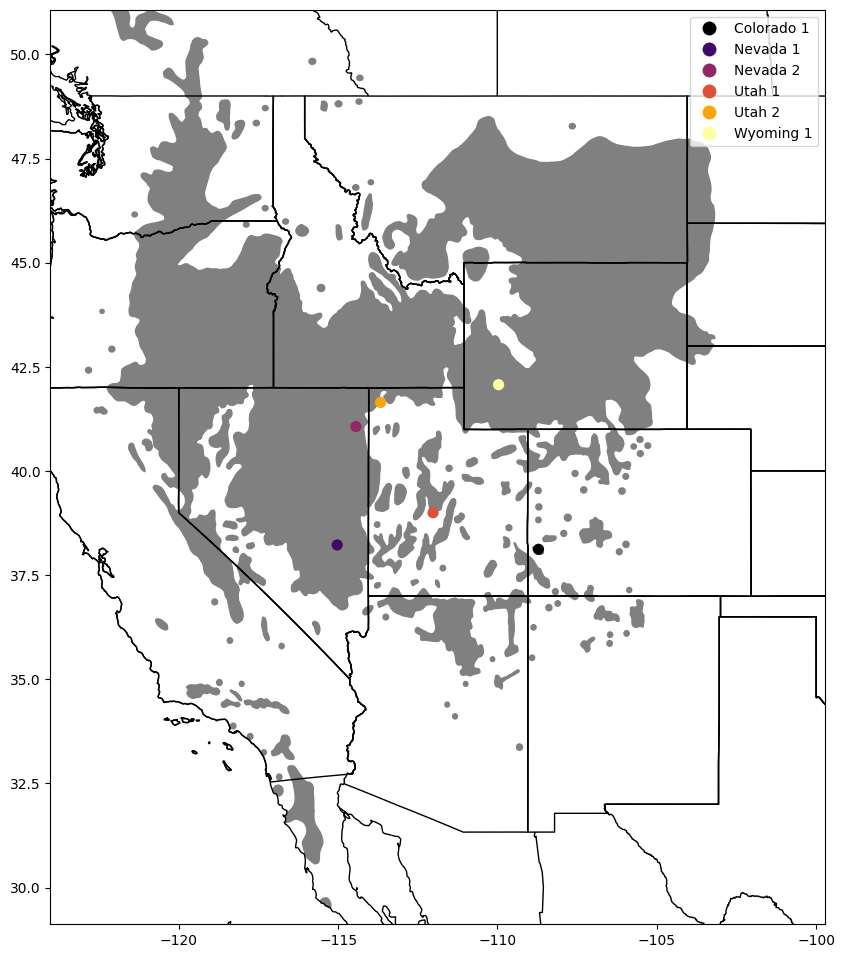

In [ ]:
fig, ax = plt.subplots(figsize = (10,12))
ax.set_xlim(minx-9, maxx+9)
ax.set_ylim(miny-9, maxy+9)

sage_loc_wgs84.plot(ax=ax,edgecolor='grey',facecolor='grey')
state_loc_wgs84.boundary.plot(ax=ax,
                              edgecolor='black',
                              linewidth=1)
nation_loc_wgs84.plot(ax=ax,
                              edgecolor='black',
                      linewidth=1)
marker_dict = {'Colorado 1':'.','Nevada 1':'v','Utah 1':'^','Utah 2':'>','Nevada 2':'<','Wyoming 1':'s'}
plot_loc.plot(column='labels',
                         categorical=True,
                         marker = '.',

                         legend=True,
                         markersize=200,
                         cmap="inferno",
                         ax=ax)

plt.show()